# Exploratory Data Analysis

In [1]:
#inspired by the Kaggle kernel from Jack Vial: https://www.kaggle.com/jackvial/exploratory-data-analysis-dsb-2018
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from glob import glob 
from tqdm import tqdm
from skimage.io import imread, imshow
import os
import cv2
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots as splt
import seaborn as sns
from sklearn.cluster import KMeans as km

TRAIN_PATH = 'stage1_train/'

train_ids = os.listdir(TRAIN_PATH)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ec2-user/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
#empty lists to contain the images and masks of Kaggle stage 1 training set
images = []
masks = []

#empty lists to contain the descriptive statistics (metadata) about the images and masks 
img_meta = []
mask_meta = []

for id_ in train_ids:
    path = TRAIN_PATH + id_ 
    image = cv2.imread(path + '/images/' + id_ + '.png')
    images.append(image)
    img_height = image.shape[0]
    img_width = image.shape[1]
    img_area = img_height * img_width
    
    
    nuc_count = 1 #initializes counting for the nuclei, only one nucleus in each mask 
    for file in os.listdir(path + '/masks/'):
        mask = cv2.imread(path + '/masks/' + file)
        masks.append(mask)
        mask_height = mask.shape[0]
        mask_width = mask.shape[1]
        mask_area = mask_height * mask_width
        
        
        #finds the area of each nucleus by summing up all pixel values (only 0, or 255) and dividing by 255
        #this finds the total number of pixels composing the nucleus, which is the area
        nuc_area = (np.sum(mask))/255
        
        nuc_img_ratio = nuc_area/mask_area
        
        nuc_count += 1
        
        mask_meta.append([mask_height, mask_width, mask_area, nuc_area, nuc_img_ratio])#adding all metadata to empty mask_meta list
    img_meta.append([img_height, img_width, img_area, nuc_count])#adds all metadata to empty image_meta list

In [3]:
print('Total number of images in training set:',len(images))
print('')
print('Total number of nuclei:', len(masks))#there is one nucleus per mask, so the number of masks = number of nuclei 

Total number of images in training set: 664

Total number of nuclei: 28986


In [4]:
#formats the image metadata into a pandas dataframe 
df_img = df(img_meta, columns = ['image height', 'image width', 'image area', 'nuclei count'])

#computes descriptive statistics on the image metadata pandas dataframe
df_img.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,image height,image width,image area,nuclei count
mean,333.731928,377.754518,1.544763e+05,44.653614
std,149.712315,205.000706,1.912921e+05,47.310443
min,256.000000,256.000000,6.553600e+04,2.000000
25%,256.000000,256.000000,6.553600e+04,16.750000
50%,256.000000,256.000000,6.553600e+04,28.000000
75%,360.000000,360.000000,1.296000e+05,55.000000
max,1040.000000,1388.000000,1.443520e+06,376.000000


In [5]:
df_mask = df(mask_meta, columns = ['mask height', 'mask width', 'mask area', 'nucleus area', 'nucleus-image ratio'])

#mask descriptive statistics in pandas dataframe format
df_mask.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,mask height,mask width,mask area,nucleus area,nucleus-image ratio
mean,403.272028,504.049127,2.501518e+05,1419.267025,0.009578
std,188.113529,283.429872,2.530311e+05,1755.307338,0.013486
min,256.000000,256.000000,6.553600e+04,63.000000,0.000060
25%,256.000000,256.000000,6.553600e+04,351.000000,0.003003
50%,260.000000,347.000000,9.022000e+04,906.000000,0.005230
75%,520.000000,696.000000,3.619200e+05,1731.000000,0.010300
max,1040.000000,1388.000000,1.443520e+06,33111.000000,0.250671


In [6]:
df_img

,image height,image width,image area,nuclei count
0,520,696,361920,261
1,520,696,361920,59
2,1024,1024,1048576,115
3,520,696,361920,131
4,256,256,65536,17
5,256,320,81920,54
6,360,360,129600,20
7,256,256,65536,38
8,256,256,65536,30
9,256,256,65536,32


In [7]:
df_mask

,mask height,mask width,mask area,nucleus area,nucleus-image ratio
0,520,696,361920,1497.0,0.004136
1,520,696,361920,729.0,0.002014
2,520,696,361920,1932.0,0.005338
3,520,696,361920,1863.0,0.005148
4,520,696,361920,279.0,0.000771
5,520,696,361920,144.0,0.000398
6,520,696,361920,627.0,0.001732
7,520,696,361920,504.0,0.001393
8,520,696,361920,1248.0,0.003448
9,520,696,361920,1530.0,0.004227


In [8]:
#this kmeans implementation is inspired by this code: https://stackoverflow.com/questions/40752088/extract-images-from-clusters-separately-in-kmeans-python
import sys
import pickle
import sklearn
from sklearn.externals import joblib
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from skimage.feature import local_binary_pattern 
from sklearn.cluster import KMeans
from scipy.stats import itemfreq 
from sklearn.preprocessing import normalize 
import cvutils 
import csv 
from matplotlib.pyplot import imshow
from PIL import Image


In [9]:
X_paths = []
X_test = []

for id_ in train_ids:
    train_paths = TRAIN_PATH + id_ + '/images/' + id_ + '.png'
    # Read the image using cv2 package
    im = cv2.imread(train_paths)
    # Convert to grayscale as Local Binary Pattern (LBP) works on grayscale image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    radius = 3
    # Number of points to be considered as neighbors 
    neighbor_points = 7 * radius

    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, neighbor_points, radius, method='uniform')

    # Calculate the histogram
    x = itemfreq(lbp.ravel())


    # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1])


    # Append image path in X_paths
    X_paths.append(train_paths)

    # Append histogram to X_test
    X_test.append(hist)

joblib.dump((X_paths, X_test), 'lbp.pkl', compress=3)

X_test = np.array(X_test)

pca = PCA(n_components = 16)
pca.fit(X_test)
pca_activations = pca.transform(X_test)

X = np.array(pca_activations)
tsne = TSNE(n_components=2, learning_rate=500, perplexity=50, verbose=2, early_exaggeration=10.0).fit_transform(X)

tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 664 samples in 0.002s...
[t-SNE] Computed neighbors for 664 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 664 / 664
[t-SNE] Mean sigma: 0.029760
[t-SNE] Computed conditional probabilities in 0.099s
[t-SNE] Iteration 50: error = 45.3456497, gradient norm = 0.2944211 (50 iterations in 0.764s)
[t-SNE] Iteration 100: error = 45.0011063, gradient norm = 0.2956212 (50 iterations in 0.778s)
[t-SNE] Iteration 150: error = 44.7140579, gradient norm = 0.3027507 (50 iterations in 0.776s)
[t-SNE] Iteration 200: error = 44.5291443, gradient norm = 0.3073688 (50 iterations in 0.776s)
[t-SNE] Iteration 250: error = 45.7430077, gradient norm = 0.2907900 (50 iterations in 0.771s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.743008
[t-SNE] Iteration 300: error = 0.3180930, gradient norm = 0.0009701 (50 iterations in 0.708s)
[t-SNE] Iteration 350: error = 0.2554938, gradient norm = 0.0004674 

## Exploratory Visualization


(256, 256, 3)


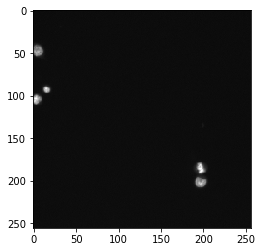

In [10]:
import random
r = random.randint(1,664)
imshow(images[r])
plt.show
print('')
print(images[r].shape)

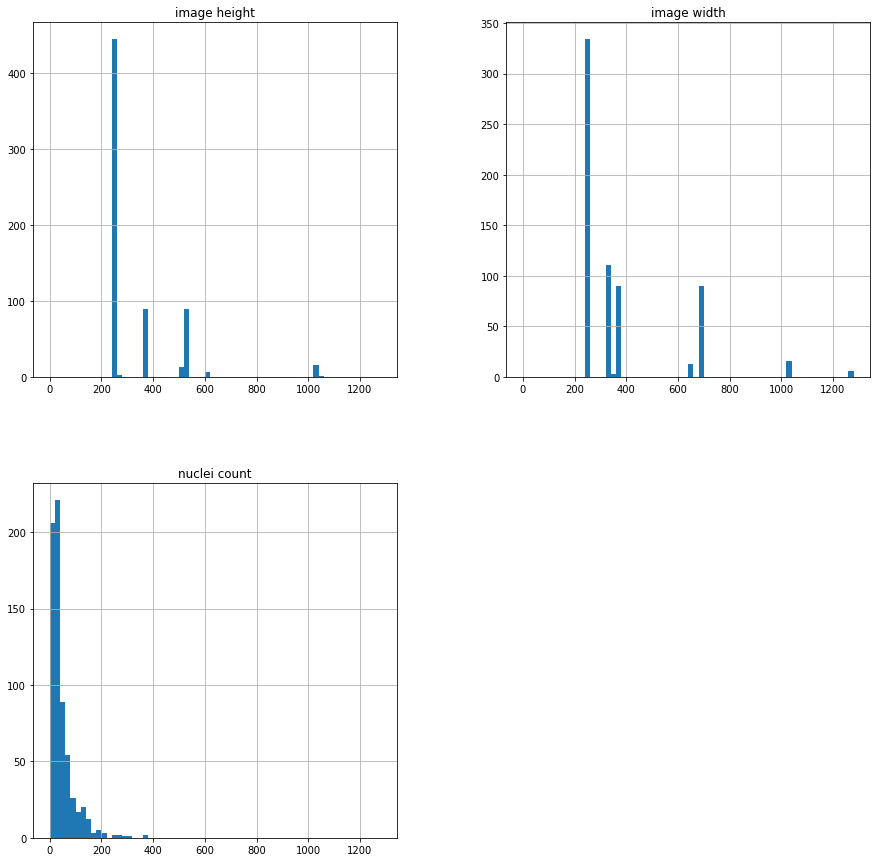

In [11]:
bin_values = np.arange(start = 0, stop = 1300, step = 20)
df_img[['image height', 'image width', 'nuclei count']].hist(bins=bin_values, figsize =[15,15])
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


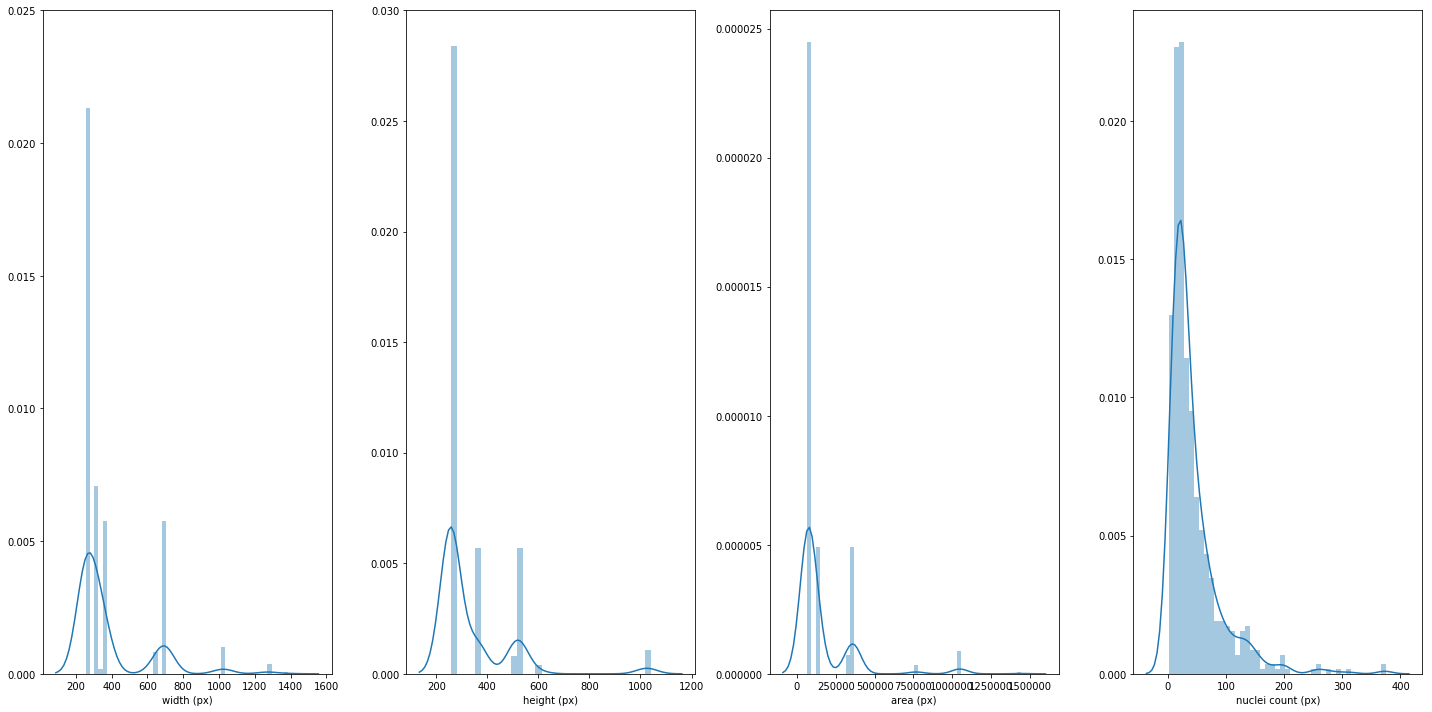

In [12]:
fig, ax = splt(nrows=1, ncols=4, figsize = (20, 10))
width_plt = sns.distplot(df_img['image width'].values, ax=ax[0])
width_plt.set(xlabel='width (px)')
width_plt.set(ylim=(0, 0.025))
height_plt = sns.distplot(df_img['image height'].values, ax=ax[1])
height_plt.set(xlabel='height (px)')
height_plt.set(ylim=(0, 0.03))
area_plt = sns.distplot(df_img['image area'].values, ax=ax[2])
area_plt.set(xlabel="area (px)")
nuclei_plt = sns.distplot(df_img['nuclei count'].values, ax=ax[3])
nuclei_plt.set(xlabel='nuclei count (px)')
fig.show()
plt.tight_layout()

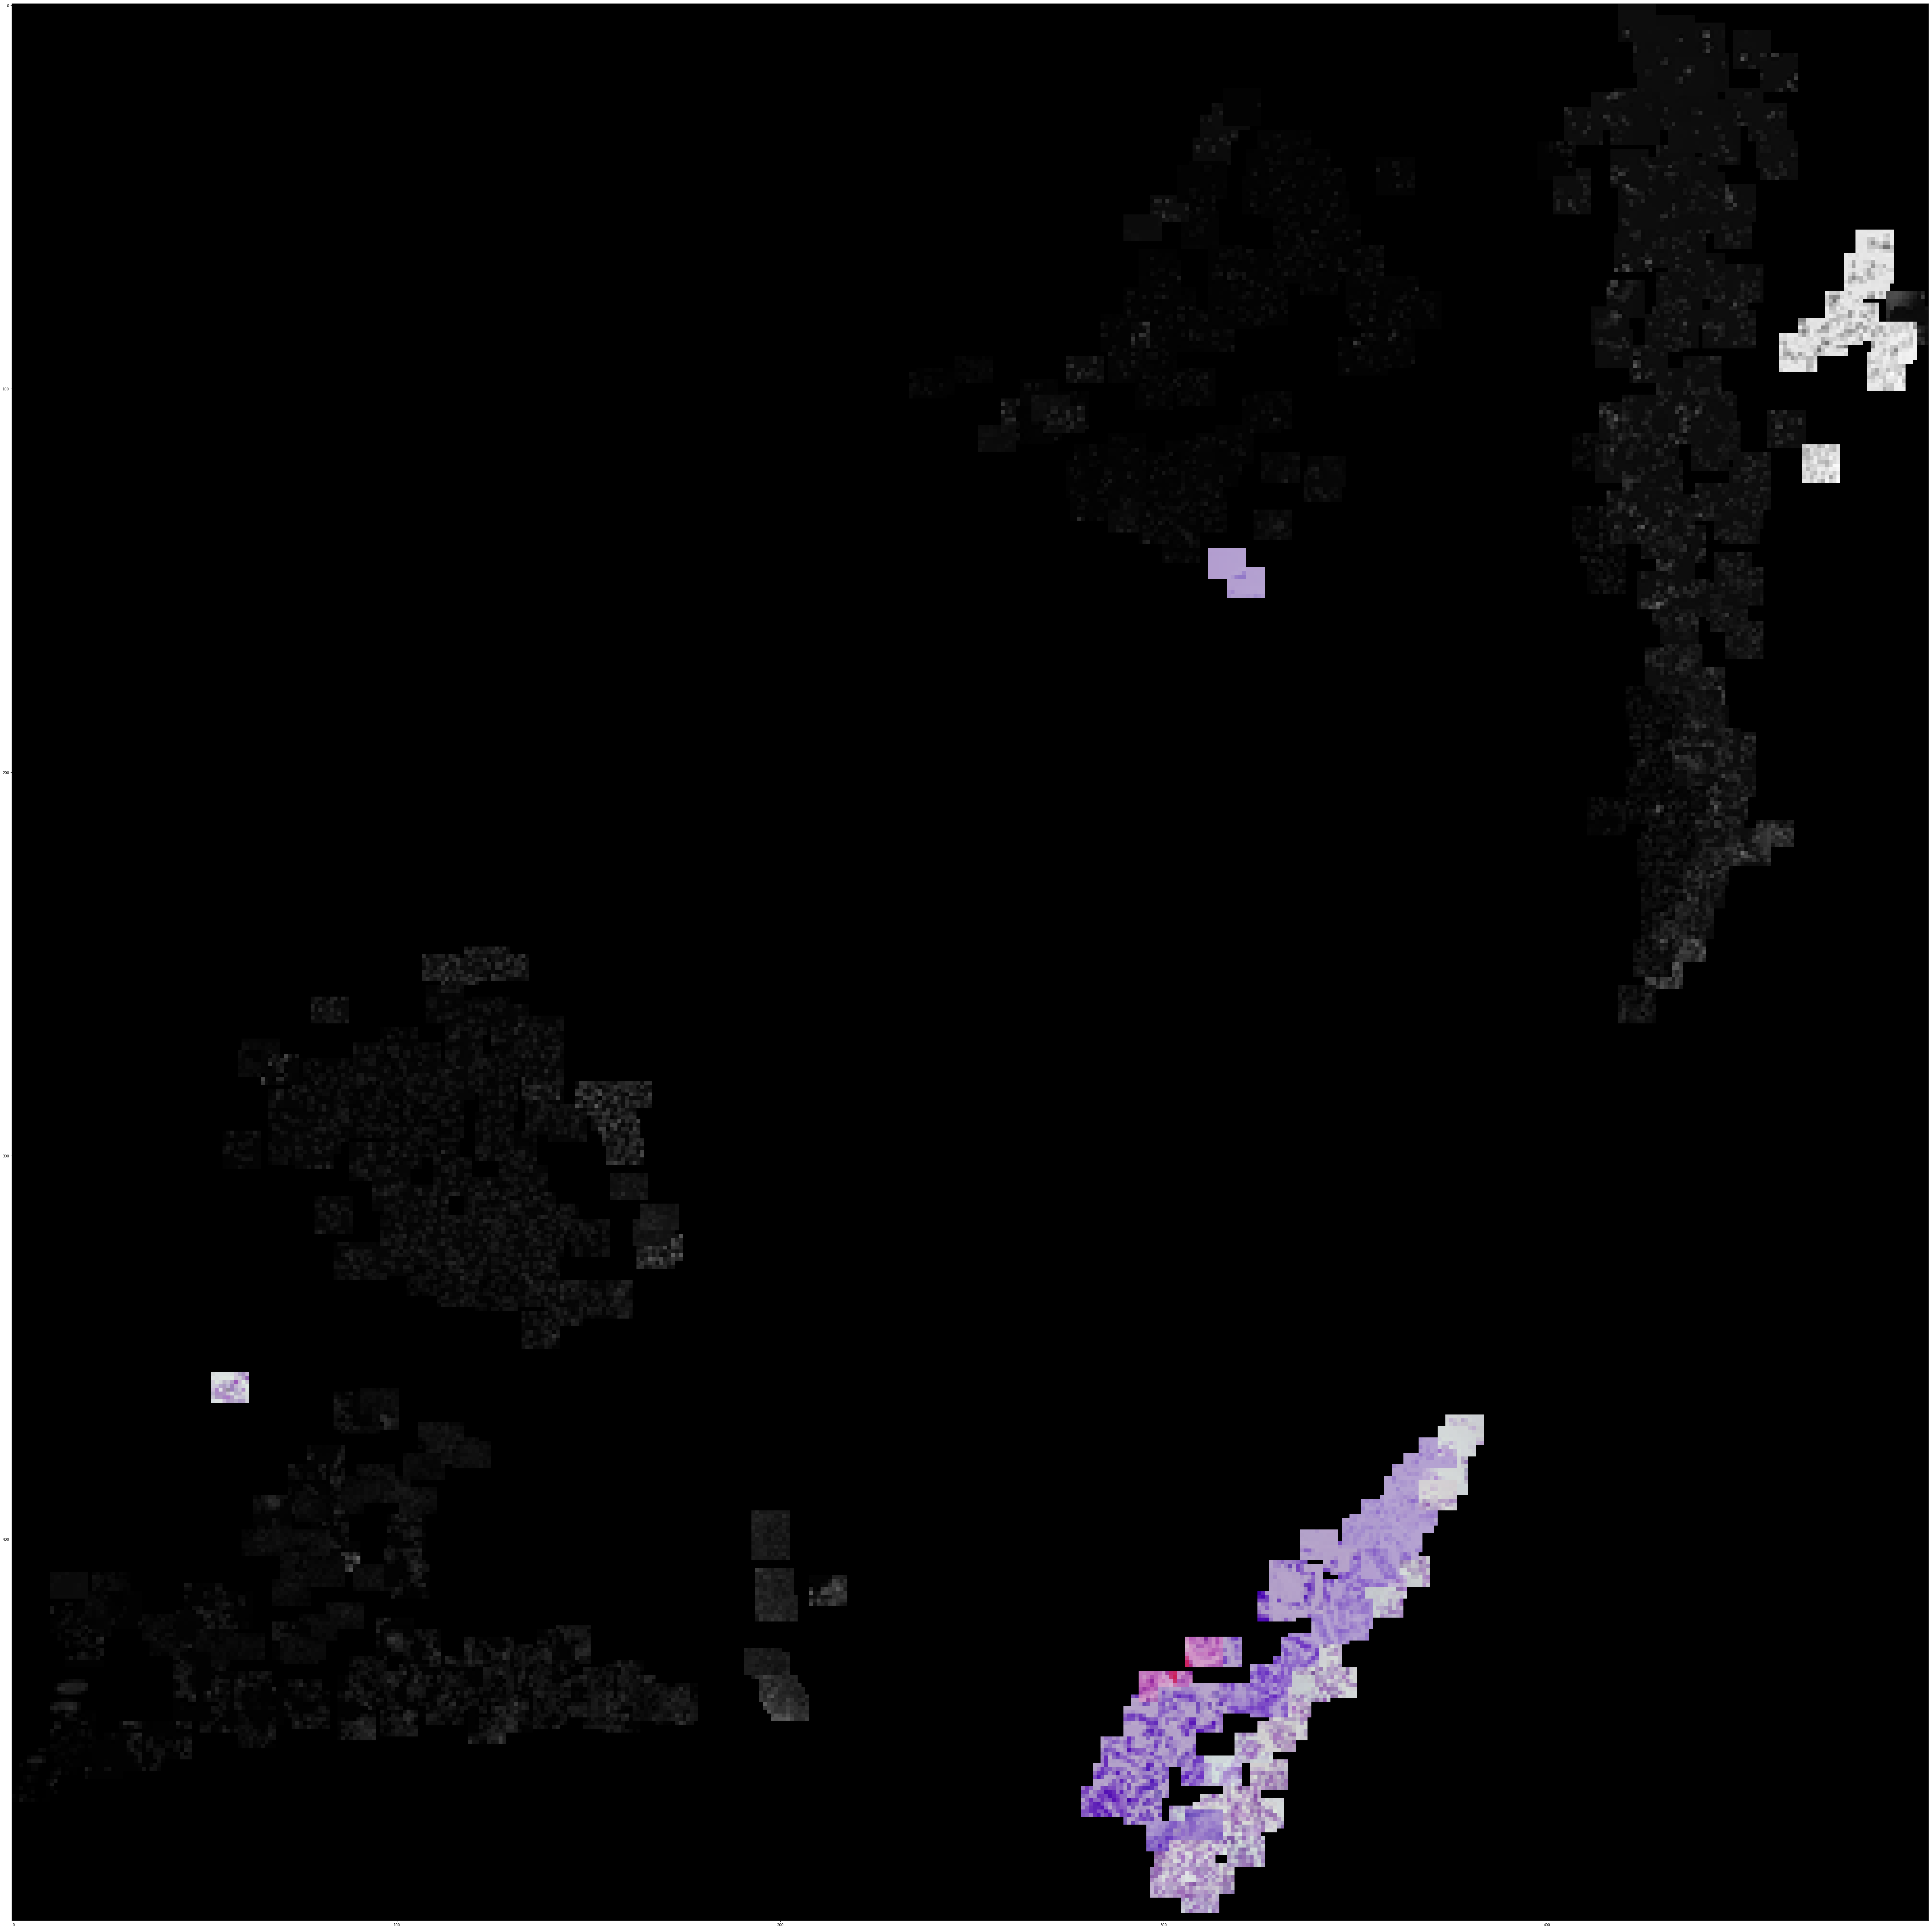

In [13]:
width = 500
height = 500
max_dim = 10

full_image = Image.new('RGB', (width, height))
for img, x, y in zip(X_paths, tx, ty):
    #print "for loop"
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)))
full_image.save("myTSNE.png")

matplotlib.pyplot.figure(figsize = (100,100))
plt.imshow(full_image)

Looking at the image above, just from looking at it, there are at least three separable image types, where one is very bright with black nuclei.
The other is bright with purple nuclei, and the rest is grayscale with white nuclei against a gray-black background. There are clear flaws, such as the minimum of three purple-white images that should be clustered with the purple-white cluster to the bottom right. And the white-background-grayscale nuclei images such be clustered further away grayscale-background images.

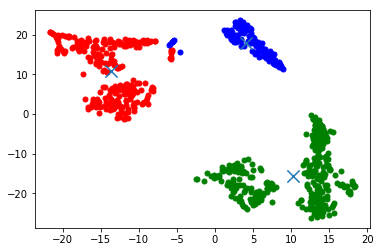

In [14]:
#Convert Images to Float32 
images = np.asarray(tsne, np.float32)
N = len(images)
images = images.reshape(N,-1)

#using kmeans clustring having 3 clusters
kmeans = KMeans(n_clusters=3)

#passing images to kmeans 
kmeans.fit(images)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(images)):
    plt.plot(images[i][0], images[i][1], colors[labels[i]], markersize = 10)

    img = cv2.convertScaleAbs(images[i])


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 20)

plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 664 samples in 0.001s...
[t-SNE] Computed neighbors for 664 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 664 / 664
[t-SNE] Mean sigma: 0.029760
[t-SNE] Computed conditional probabilities in 0.097s
[t-SNE] Iteration 50: error = 45.2825470, gradient norm = 0.3072417 (50 iterations in 0.778s)
[t-SNE] Iteration 100: error = 44.7742004, gradient norm = 0.2982065 (50 iterations in 0.778s)
[t-SNE] Iteration 150: error = 44.7234726, gradient norm = 0.3027200 (50 iterations in 0.790s)
[t-SNE] Iteration 200: error = 44.9143181, gradient norm = 0.3065042 (50 iterations in 0.780s)
[t-SNE] Iteration 250: error = 45.3614464, gradient norm = 0.2937697 (50 iterations in 0.791s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.361446
[t-SNE] Iteration 300: error = 0.2559184, gradient norm = 0.0018825 (50 iterations in 0.736s)
[t-SNE] Iteration 350: error = 0.2441252, gradient norm = 0.0002350 

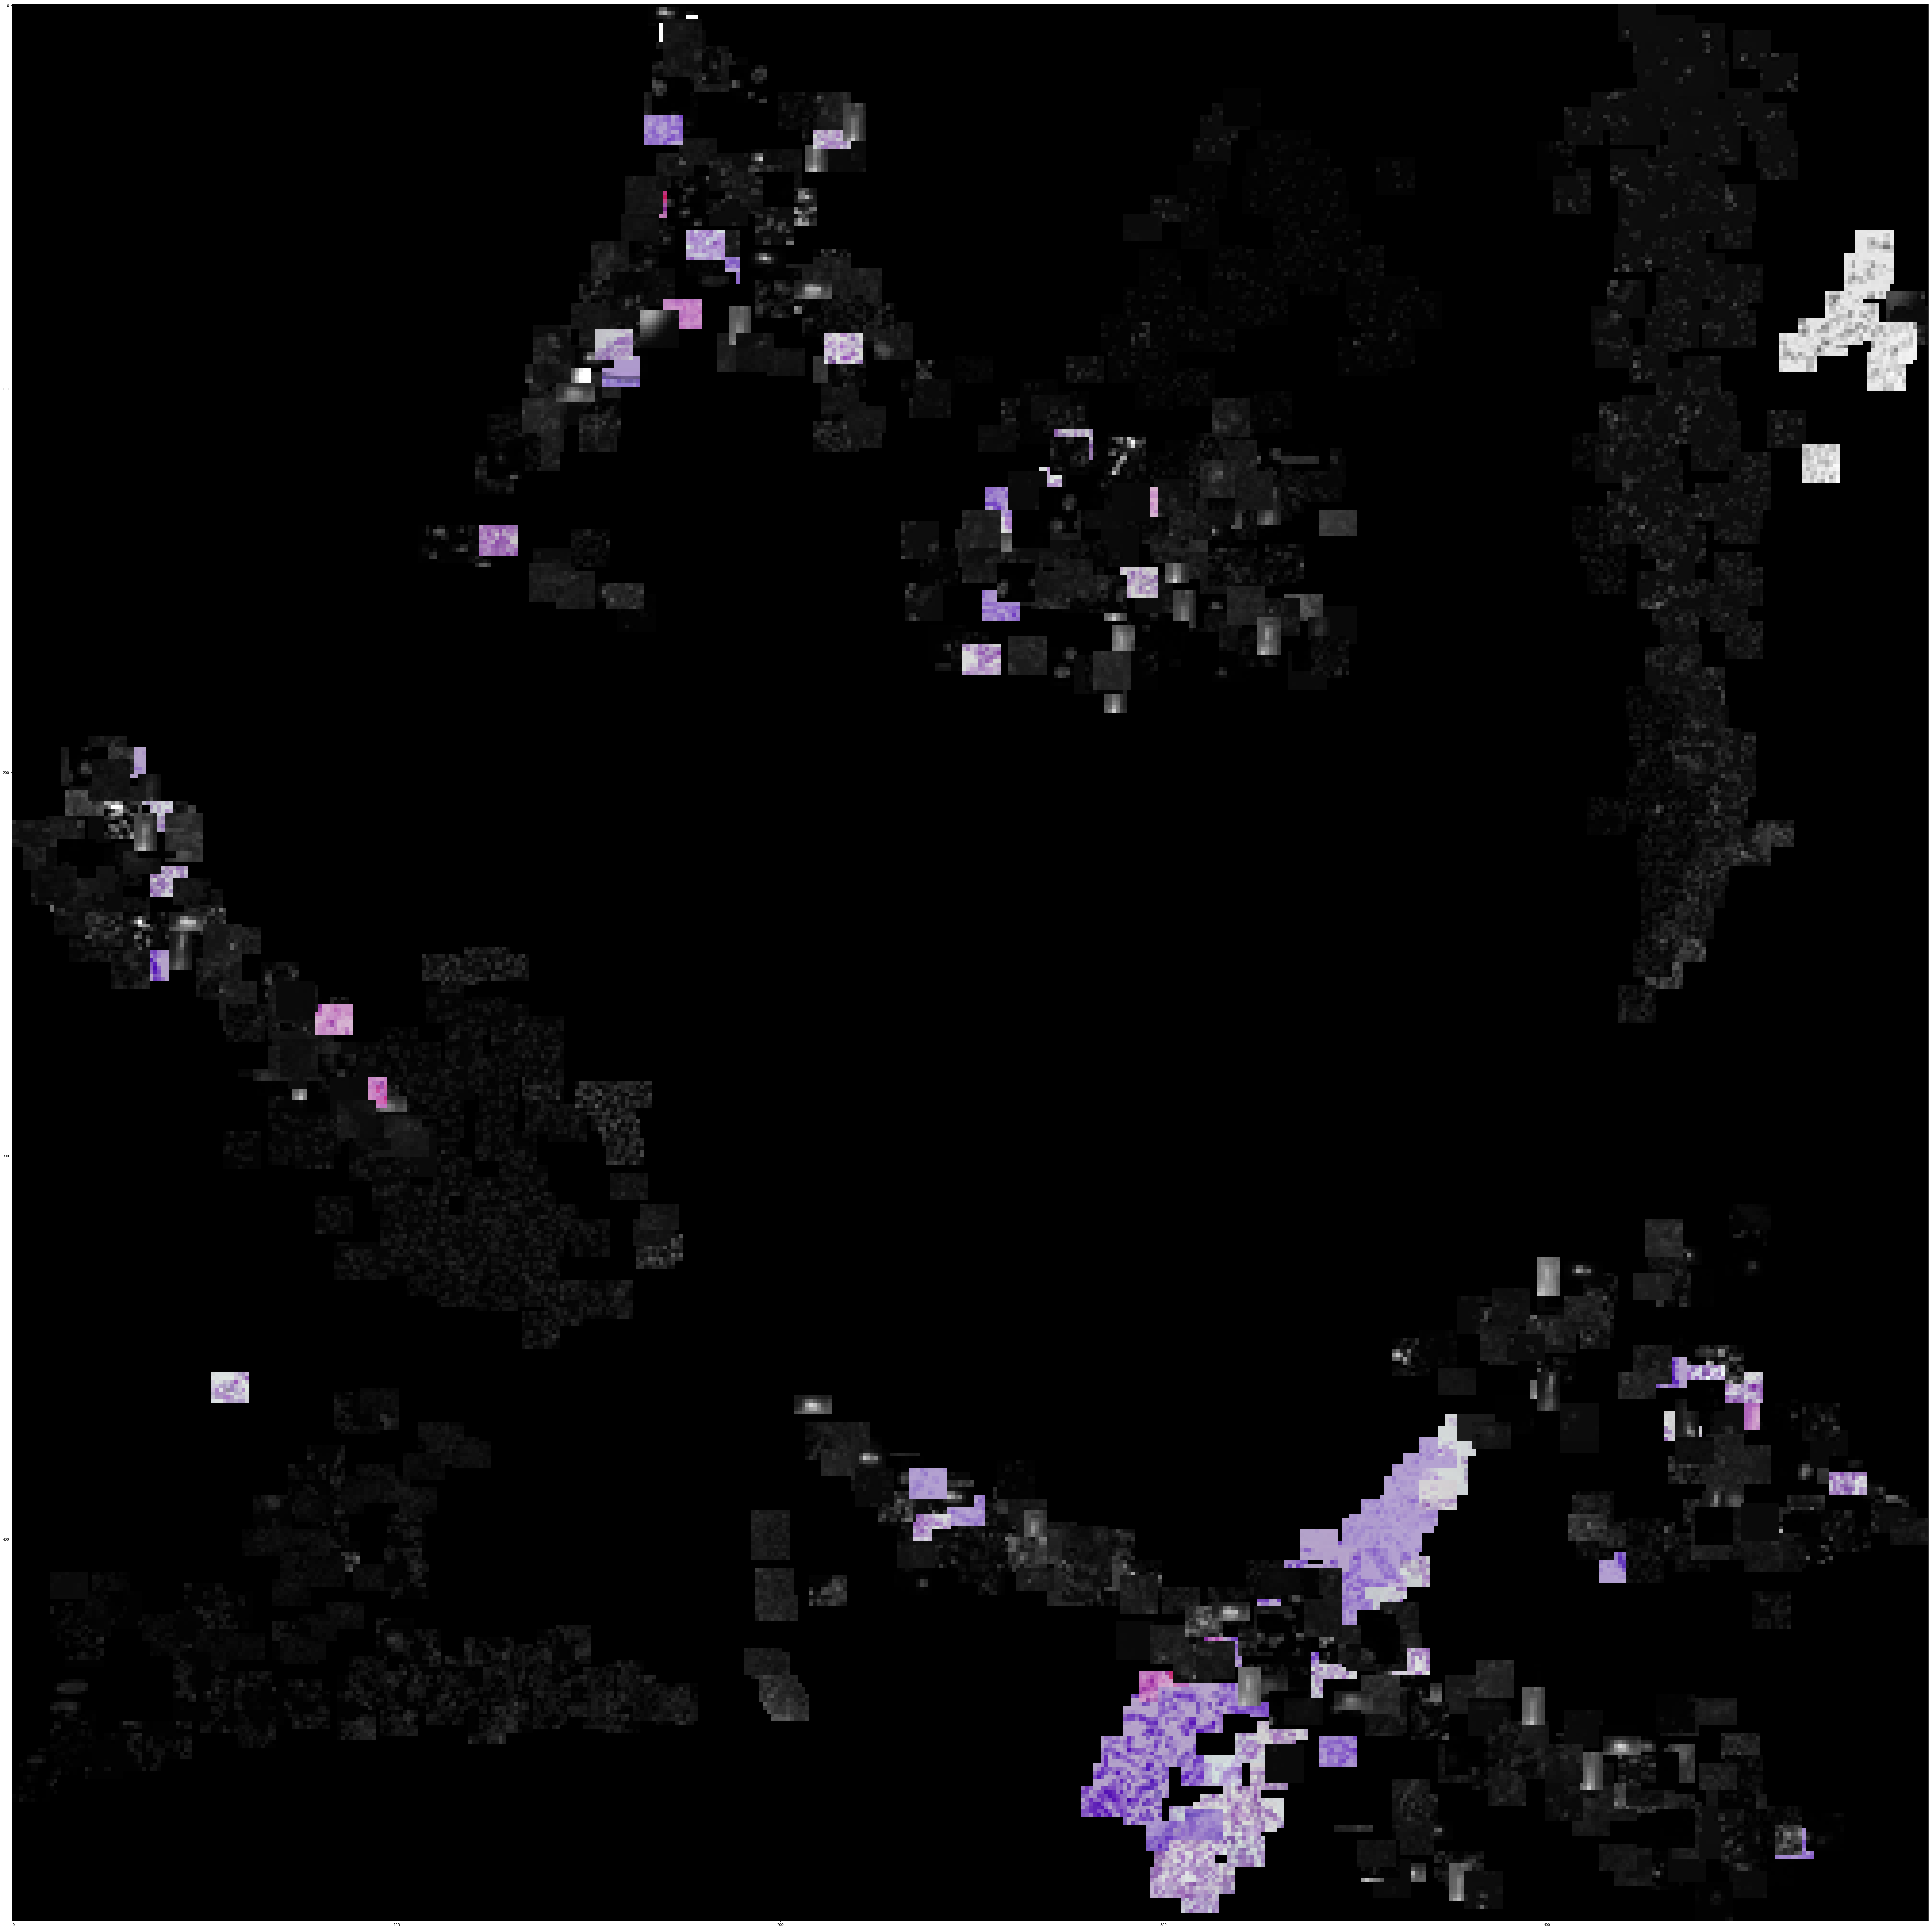

In [15]:
test_path = 'stage2_test/'
test_ids = os.listdir(test_path)
X2_paths = []
X2_test = []
for id_ in test_ids: 
    test_paths = test_path + id_ + '/images/' + id_ + '.png'
    cv2.imread(test_paths)
     # Convert to grayscale as Local Binary Pattern (LBP) works on grayscale image
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    radius = 3
    # Number of points to be considered as neighbors 
    neighbor_points = 7 * radius

    # Uniform LBP is used
    lbp = local_binary_pattern(im_gray, neighbor_points, radius, method='uniform')

    # Calculate the histogram
    x = itemfreq(lbp.ravel())


    # Normalize the histogram
    hist = x[:, 1]/sum(x[:, 1])


    # Append image path in X_paths
    X2_paths.append(test_paths)

    # Append histogram to X_test
    X2_test.append(hist)

joblib.dump((X2_paths, X2_test), 'lbp.pkl', compress=3)

X2_test = np.array(X_test)

pca = PCA(n_components = 16)
pca.fit(X2_test)
pca_activations = pca.transform(X2_test)

X2 = np.array(pca_activations)
tsne = TSNE(n_components=2, learning_rate=500, perplexity=50, verbose=2, early_exaggeration=10.0).fit_transform(X2)

tx2, ty2 = tsne[:,0], tsne[:,1]
tx2 = (tx2-np.min(tx2)) / (np.max(tx2) - np.min(tx2))
ty2 = (ty2-np.min(ty2)) / (np.max(ty2) - np.min(ty2))

width = 500
height = 500
max_dim = 10

full_image2 = Image.new('RGB', (width, height))
for img, x, y in zip(X2_paths, tx2, ty2):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)))
#full_image.save("myTSNE.png")

matplotlib.pyplot.figure(figsize = (100,100))
plt.imshow(full_image)

This is definitely much more of a mess and flawed than the previous tsne. 
So performing any KMeans on these data points will not yield accurate clusters.

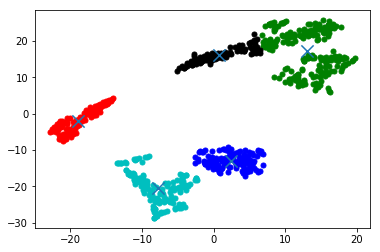

In [16]:
#Convert Images to Float32 
images = np.asarray(tsne, np.float32)
N = len(images)
images = images.reshape(N,-1)

#using kmeans clustring having 5 clusters
kmeans = KMeans(n_clusters=5)

#passing images to kmeans 
kmeans.fit(images)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = 10*['r.','g.','b.','c.','k.','y.','m.']

for i in range(len(images)):
    plt.plot(images[i][0], images[i][1], colors[labels[i]], markersize = 10)

    img = cv2.convertScaleAbs(images[i])


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 20)

plt.show()